Link of the Dataset from Kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


# **Classification Task**

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data Preprocessing and Exploratory Data Analysis

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings("ignore")

# Load dataset

In [89]:
# Load the dataset
file_path = "/content/drive/MyDrive/AI Coursework/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(file_path)

df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [90]:
#identify the number of rows and columns in the dataset.
rows, cols = df.shape
print(f"Number of rows: {rows}, Number of columns: {cols}")

Number of rows: 5110, Number of columns: 12


In [91]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [92]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Handeling missing values

In [93]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [94]:
#To fill in value using median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [95]:
# drop the 'id' column. it is a unique identifier, which has no predictive power.
df = df.drop('id', axis=1)

In [96]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [97]:
print("Columns after cleaning:")
df.columns

Columns after cleaning:


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [98]:
print(f"Dataset shape after cleaning: {df.shape}")

Dataset shape after cleaning: (5110, 11)


In [99]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode categorical variables
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col].astype(str))

# Preview the dataset after encoding
print("Dataset after encoding:")
df.head()

Dataset after encoding:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


# EDA

Outliers in 'bmi' column:
       bmi
21    48.9
66    47.5
113   56.6
254   50.1
258   54.6
...    ...
4906  54.1
4952  56.6
5009  49.5
5057  47.6
5103  46.9

[126 rows x 1 columns]

There are outliers present in the BMI data.


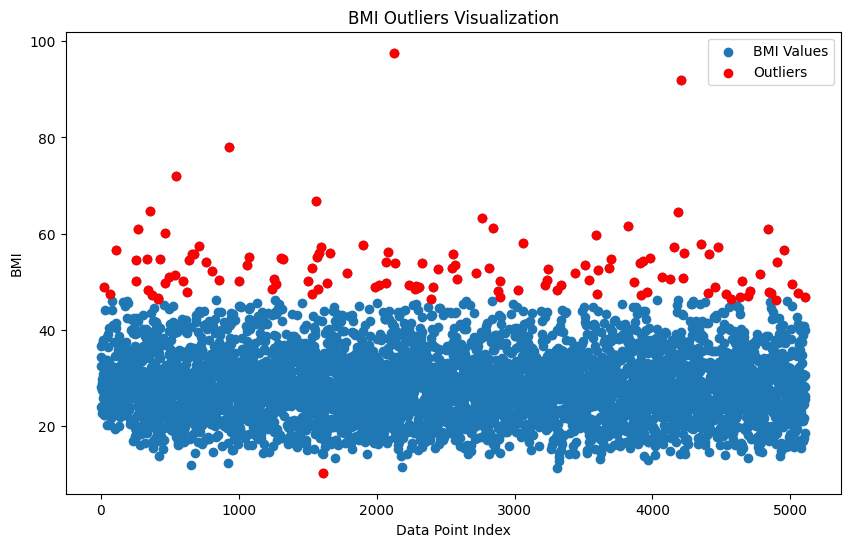

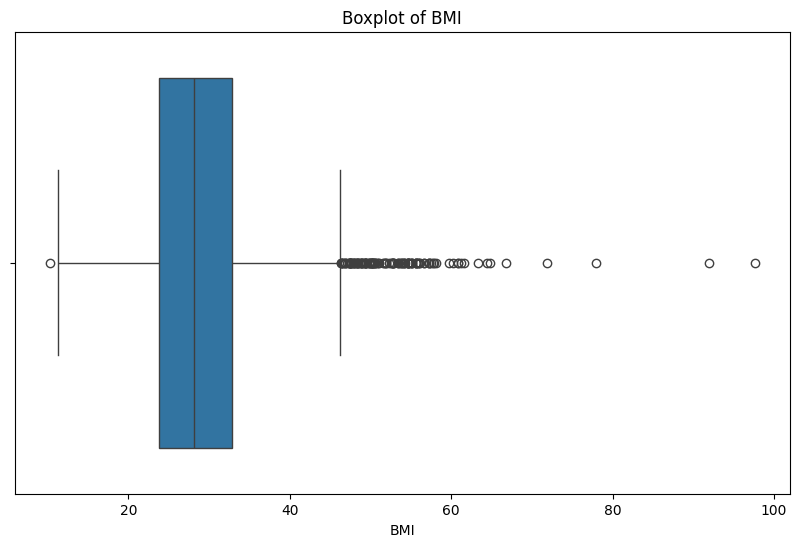

In [100]:
#Checking for outliers

# Calculate Q1, Q3, and IQR for BMI
Q1_bmi = df['bmi'].quantile(0.25)
Q3_bmi = df['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

# Define bounds for BMI outliers
lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi

# Identify BMI outliers
bmi_outliers = df[(df['bmi'] < lower_bound_bmi) | (df['bmi'] > upper_bound_bmi)]

# Print BMI outlier information and visualize them
if len(bmi_outliers) > 0:
    print("Outliers in 'bmi' column:")
    print(bmi_outliers[['bmi']])
    print("\nThere are outliers present in the BMI data.")

    # Visualize BMI outliers using a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, df['bmi'], label='BMI Values')
    plt.scatter(bmi_outliers.index, bmi_outliers['bmi'], color='red', label='Outliers')
    plt.title('BMI Outliers Visualization')
    plt.xlabel('Data Point Index')
    plt.ylabel('BMI')
    plt.legend()
    plt.show()
else:
    print("\nNo outliers detected in the BMI data.")

# Create the boxplot for BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['bmi'])
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.show()


In [101]:
#removing outliers from BMI column

# Filter out outliers from the DataFrame
df_no_outliers_bmi = df[(df['bmi'] >= lower_bound_bmi) & (df['bmi'] <= upper_bound_bmi)]

# Print the number of outliers removed
outliers_removed = len(df) - len(df_no_outliers_bmi)
print(f"Number of outliers removed from 'bmi' column: {outliers_removed}")

# Now 'df_no_outliers_bmi' contains the data with outliers removed from the 'bmi' column


Number of outliers removed from 'bmi' column: 126


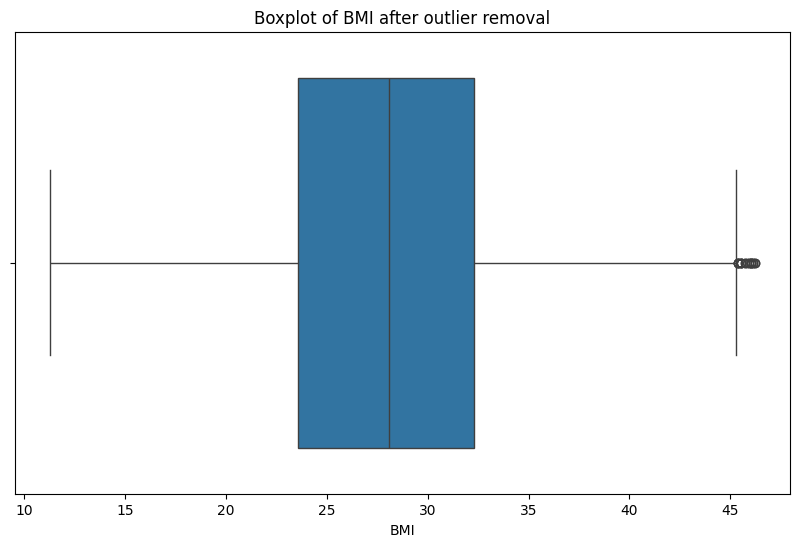

In [102]:
# Create the boxplot for BMI after outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers_bmi['bmi'])
plt.title('Boxplot of BMI after outlier removal')
plt.xlabel('BMI')
plt.show()


 1.5 × IQR rule is a standard but not always strict enough for certain datasets, therefore there are still some outliers present in the bmi column

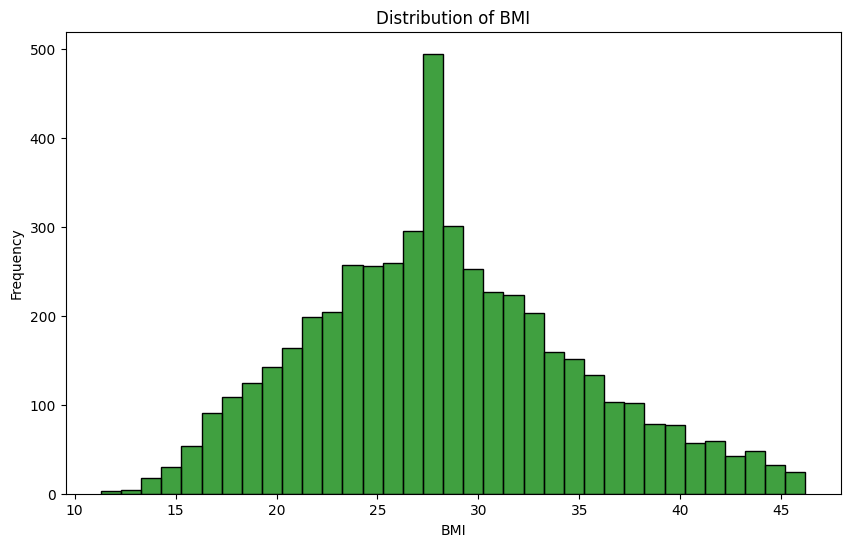

In [103]:
# Create the histplot for BMI
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers_bmi['bmi'], color="green")  # Added kde=True for kernel density estimation
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


The BMI distribution shows a nearly symmetrical pattern with a slight right skew. The mean (28.25), median (28.10), and mode (28.10) are closely aligned, indicating minimal skewness. Most individuals have a BMI between 25 and 32. The slight skew results from high BMI values above 40, indicating potential outliers.

Outliers in 'avg_glucose_level' column:
      avg_glucose_level
0                228.69
1                202.21
3                171.23
4                174.12
5                186.21
...                 ...
5061             223.78
5062             211.58
5063             179.38
5064             193.88
5076             174.37

[594 rows x 1 columns]


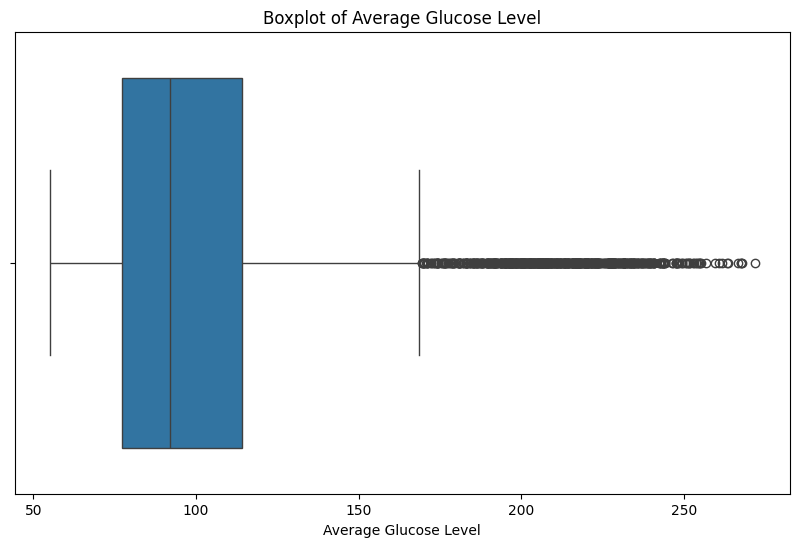

In [104]:
#Calculating outliers for average glucose level

# Calculate Q1, Q3, and IQR
Q1_glucose = df_no_outliers_bmi['avg_glucose_level'].quantile(0.25)
Q3_glucose = df_no_outliers_bmi['avg_glucose_level'].quantile(0.75)
IQR_glucose = Q3_glucose - Q1_glucose

# Define bounds for outliers
lower_bound_glucose = Q1_glucose - 1.5 * IQR_glucose
upper_bound_glucose = Q3_glucose + 1.5 * IQR_glucose

# Identify outliers
outliers = df_no_outliers_bmi[(df_no_outliers_bmi['avg_glucose_level'] < lower_bound_glucose) | (df_no_outliers_bmi['avg_glucose_level'] > upper_bound_glucose)]

# Print outlier information
if len(outliers) > 0:
    print("Outliers in 'avg_glucose_level' column:")
    print(outliers[['avg_glucose_level']])  # Print only the avg_glucose_level values
else:
    print("\nNo outliers detected in the average glucose level data.")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['avg_glucose_level'])
plt.title('Boxplot of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.show()


In [105]:
# Remove outliers from the DataFrame
df_no_glucose_and_bmi_outliers = df_no_outliers_bmi[(df_no_outliers_bmi['avg_glucose_level'] >= lower_bound_glucose) & (df_no_outliers_bmi['avg_glucose_level'] <= upper_bound_glucose)]

# Print the number of outliers removed
glucose_outliers_removed = len(df) - len(df_no_glucose_and_bmi_outliers)
print(f"Number of outliers removed from 'avg_glucose_level' column: {glucose_outliers_removed}")

# Now 'df_no_glucose_outliers' contains the data with outliers removed from the 'avg_glucose_level' column


Number of outliers removed from 'avg_glucose_level' column: 720


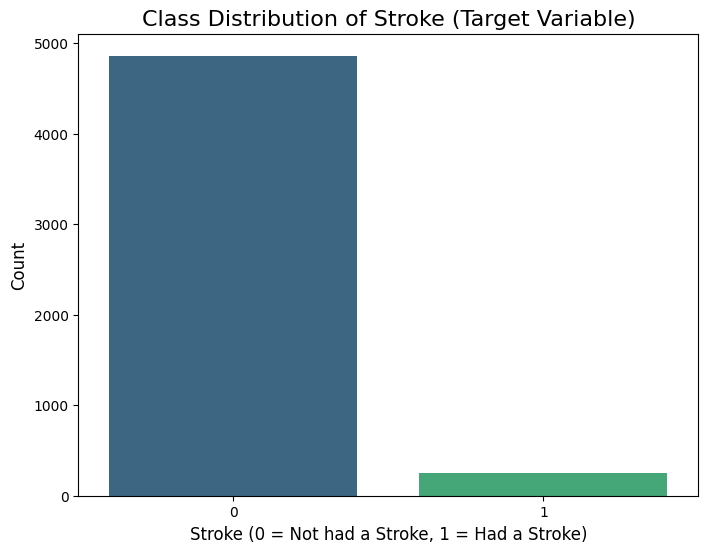

In [106]:
# Countplot for class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='stroke', palette='viridis')

# Adding titles and labels
plt.title('Class Distribution of Stroke (Target Variable)', fontsize=16)
plt.xlabel('Stroke (0 = Not had a Stroke, 1 = Had a Stroke)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


According to the countplot above, the number of individuals who have not had a stroke (0) is far greater than the number of individuals who have had a stroke (1), which clearly shows a significant imbalance in the dataset.

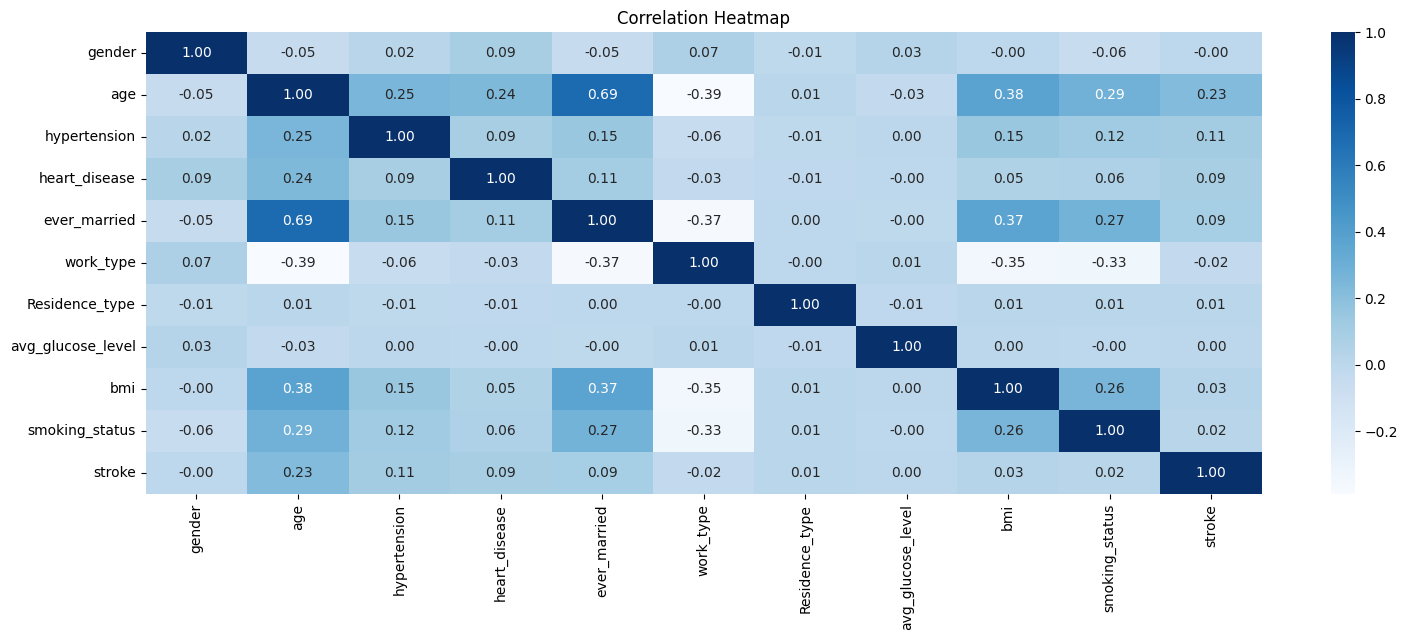

In [107]:
plt.figure(figsize=(18, 6))
sns.heatmap(df_no_glucose_and_bmi_outliers.corr(), annot=True,cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The above plot is a correlation heatmap displaying relationships between variables in a stroke dataset. Blue shades indicate positive correlations; lighter shades suggest weaker ones. Age, BMI, and marriage status show some correlation with stroke, while gender has a minimal correlation. The numbers quantify the correlation strength

## Data separation

In [108]:
df_final = df_no_glucose_and_bmi_outliers

In [109]:
# Separate features (X) and target (y)
X = df_final.drop('stroke', axis=1)
y = df_final['stroke']

## One Hot encoder

In [110]:
# One-hot encode the target variable
one_hot_encoder = OneHotEncoder(sparse_output=False)
y_one_hot = one_hot_encoder.fit_transform(y.values.reshape(-1, 1))


In [111]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [112]:
# Apply SMOTE for class balancing

# Creates a SMOTE object to generate synthetic samples for the minority class.
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [113]:
# Finds unique class labels from y_resampled.
unique_classes = np.unique(y_resampled)

# class_weight="balanced" automatically assigns higher weights to minority classes.
class_weights = compute_class_weight(class_weight="balanced", classes=unique_classes, y=y_resampled)

class_weights = dict(zip(unique_classes, class_weights))  # Creates a dictionary mapping classes to weights

In [114]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [115]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building Model from scratch

In [116]:
def sigmoid(x):
  y = 1 / (1 + np.exp(-x))
  return y

In [117]:
def log_loss(y_true, y_pred):
  # Uses np.clip() to limit the values of y_pred
  y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
  loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  return loss

In [118]:
# computes the average log loss (cross-entropy loss) over multiple data points
def cost_function(y_true, y_pred):
    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
    n = len(y_true)  # Get the number of data points
    loss_vec = [log_loss(y_true[i], y_pred[i]) for i in range(n)] # Calculate log loss for each data point
    cost = sum(loss_vec) / n  # Calculate average log loss (cost)
    return cost

In [119]:
def costfunction_logreg(X, y, w, b):
    m, n = X.shape
    assert len(y) == m
    assert len(w) == n

    # Compute z using np.dot
    z = np.dot(X, w) + b  # Matrix-vector multiplication and adding bias

    # Compute predictions using logistic function (sigmoid)
    y_pred = 1 / (1 + np.exp(-z))

    # Compute the cost using the cost function
    cost = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / m

    return cost


In [120]:
def compute_gradient(X, y, w, b):
    n, d = X.shape  # X has shape (n, d)
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Compute predictions using logistic function (sigmoid)
    y_pred = sigmoid(np.dot(X, w) + b)  # Compute z = X * w + b

    # Compute gradients
    grad_w = np.dot(X.T, (y_pred - y)) / n  # Gradient w.r.t weights, shape (d,)
    grad_b = np.sum(y_pred - y) / n          # Gradient w.r.t bias, scalar

    return grad_w, grad_b

In [121]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_w, grad_b = compute_gradient(X, y, w, b) # Calling the compute_gradient function to get gradients

        # Update weights and bias
        w -= alpha * grad_w  # Updating weights using gradients and learning rate
        b -= alpha * grad_b  # Updating bias using gradients and learning rate

        # Compute cost
        cost = costfunction_logreg(X, y, w, b)

        # Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history


In [122]:
def prediction(X, w, b, threshold=0.5):
    # Compute the predicted probabilities using the logistic function
    y_test_prob = sigmoid(np.dot(X, w) + b)

    # Classify based on the threshold
    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred

In [123]:

def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                  [FN, TP]])

    # Precision, recall, and F1-score with safe handling of zero division
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0  # Recall calculation
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0  # F1-score calculation

    # Ensure metrics are floats
    precision = float(precision)
    recall = float(recall)
    f1_score = float(f1_score)

    # Return metrics
    return confusion_matrix, precision, recall, f1_score

In [124]:
# Initialize parameters
n_features = X_train.shape[1]
w_initial = np.zeros(n_features) # Initialize weights to zero
b_initial = 0.0             # Initialize bias to zero
alpha = 0.01                # Learning rate
n_iter = 1000              # Number of iterations

# Train the model using gradient descent
w_final, b_final, cost_history, params_history = gradient_descent(X_train_scaled, y_train, w_initial, b_initial, alpha, n_iter, show_cost=True, show_params=False)


Iteration 0: Cost = 0.691736
Iteration 100: Cost = 0.598013
Iteration 200: Cost = 0.553591
Iteration 300: Cost = 0.528440
Iteration 400: Cost = 0.512392
Iteration 500: Cost = 0.501321
Iteration 600: Cost = 0.493264
Iteration 700: Cost = 0.487174
Iteration 800: Cost = 0.482437
Iteration 900: Cost = 0.478669
Iteration 999: Cost = 0.475645


In [125]:
# Optionally, make predictions on the test set and evaluate the classifier:
y_pred_test = prediction(X_test_scaled, w_final, b_final)
y_pred_train = prediction(X_train_scaled, w_final, b_final)
conf_matrix, precision, recall, f1 = evaluate_classification(y_test, y_pred_test)

In [126]:
print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

Confusion Matrix:
[[635 207]
 [148 700]]
Precision: 0.7718, Recall: 0.8255, F1-score: 0.7977


In [127]:
# Model Evaluation on the Train Set
print("\n Model Evaluation on Train Set:")
print(f"Accuracy: {accuracy_score(y_train, y_pred_train):.3f}\n")
print("Classification Report:\n", classification_report(y_train, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))


 Model Evaluation on Train Set:
Accuracy: 0.781

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.72      0.77      3383
           1       0.75      0.84      0.79      3377

    accuracy                           0.78      6760
   macro avg       0.79      0.78      0.78      6760
weighted avg       0.79      0.78      0.78      6760

Confusion Matrix:
 [[2439  944]
 [ 536 2841]]


In [128]:
# Model Evaluation on the Test Set
print("\n Model Evaluation on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.3f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


 Model Evaluation on Test Set:
Accuracy: 0.790

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       842
           1       0.77      0.83      0.80       848

    accuracy                           0.79      1690
   macro avg       0.79      0.79      0.79      1690
weighted avg       0.79      0.79      0.79      1690

Confusion Matrix:
 [[635 207]
 [148 700]]


# Model 1: Random Forest Classifier

In [129]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced",max_depth=10)

rf_model.fit(X_train, y_train)  # Use y_train directly if it contains binary labels


RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [130]:
# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [131]:
# Model Evaluation
print("\n Random Forest Model Evaluation on Train Set:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_rf):.2f}")
print("\nClassification Report:\n", classification_report(y_train, y_train_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred_rf))


 Random Forest Model Evaluation on Train Set:
Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.95      3383
           1       0.92      0.98      0.95      3377

    accuracy                           0.95      6760
   macro avg       0.95      0.95      0.95      6760
weighted avg       0.95      0.95      0.95      6760


Confusion Matrix:
 [[3082  301]
 [  56 3321]]


In [132]:
# Model Evaluation
print("\n Random Forest Model Evaluation on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_rf):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf))


 Random Forest Model Evaluation on Test Set:
Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       842
           1       0.91      0.96      0.94       848

    accuracy                           0.93      1690
   macro avg       0.93      0.93      0.93      1690
weighted avg       0.93      0.93      0.93      1690


Confusion Matrix:
 [[764  78]
 [ 34 814]]


# Model 2: Logistic Regression




In [133]:
log_reg_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Fit the model on the training data.
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [134]:
# Make predictions on the test set.
y_test_pred_logreg = log_reg_model.predict(X_test_scaled)
y_train_pred_logreg = log_reg_model.predict(X_train_scaled)

In [135]:
# Evaluate the performance of the logistic regression model on train set

print(" Logistic Regression Model Evaluation on Train Set:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_logreg):.2f}\n")
print("Classification Report:\n", classification_report(y_train, y_train_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_logreg))

 Logistic Regression Model Evaluation on Train Set:
Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78      3383
           1       0.77      0.82      0.79      3377

    accuracy                           0.79      6760
   macro avg       0.79      0.79      0.79      6760
weighted avg       0.79      0.79      0.79      6760

Confusion Matrix:
 [[2534  849]
 [ 598 2779]]


In [136]:
# Evaluate the performance of the logistic regression model on test set

print(" Logistic Regression Model Evaluation on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_logreg):.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_test_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_logreg))

 Logistic Regression Model Evaluation on Test Set:
Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       842
           1       0.79      0.81      0.80       848

    accuracy                           0.79      1690
   macro avg       0.79      0.79      0.79      1690
weighted avg       0.79      0.79      0.79      1690

Confusion Matrix:
 [[659 183]
 [164 684]]


The Random Forest model performed significantly better than the Logistic Regression model based on multiple evaluation metrics:

* Accuracy:

Logistic Regression: 0.79

Random Forest: 0.93

 Random Forest has higher accuracy.

* Precision, Recall, and F1-score:

Random Forest has higher precision, recall, and F1-scores for both classes (0 and 1), meaning it is more effective at correctly classifying both positive and negative cases.
Random Forest dominates in all these metrics.

* Confusion Matrix:

Logistic Regression had 183 false positives and 164 false negatives.

Random Forest had only 78 false positives and 34 false negatives.

Random Forest makes fewer classification errors.

Thus, the Random Forest model demonstrates a much stronger performance for this classification task compared to the Logistic Regression model.

# Hyperparameter optimization



## Hyperparameter Optimization: Random Forest




In [137]:
rf_param_dist = {
"n_estimators": [20, 50, 100, 150],
"max_depth": [2,5,9,10,],
"min_samples_split": [2, 5, 10],
"min_samples_leaf": [1, 2, 4],
}

In [138]:
rf_model = RandomForestClassifier(random_state=42, class_weight="balanced")

In [139]:
random_search = RandomizedSearchCV(
rf_model,
param_distributions=rf_param_dist,
n_iter=50,
cv=5,
scoring="f1",
random_state=42
)

In [140]:
random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [2, 5, 9, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 50, 100, 150]},
                   random_state=42, scoring='f1')

In [141]:
best_rf_model_rand = random_search.best_estimator_
print("The best Random Forest Parameters:", random_search.best_params_)

The best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}


## Hyperparameter Optimization: Logistic Regression


In [142]:
# Logistic Regression Hyperparameter Grid
log_reg_param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"],
    "penalty": [ "l2"]
}

# Logistic Regression with GridSearchCV
log_reg_model = LogisticRegression(random_state=42, class_weight="balanced", max_iter=1000)
log_reg_grid_search = GridSearchCV(log_reg_model, log_reg_param_grid, cv=5, scoring="f1")
log_reg_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='f1')

In [143]:
# Best parameters for Logistic Regression
best_log_reg_model = log_reg_grid_search.best_estimator_
print("Best Logistic Regression Parameters:", log_reg_grid_search.best_params_)

Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


#Feature Selection

## Feature Selection: Random Forest

In [144]:
# Use SelectFromModel to select features based on feature importances
selector = SelectFromModel(rf_model, threshold='median') # Select features with importance above the median
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

print("Selected Feature Indices:", selected_feature_indices)


# Get the names of selected features
selected_feature_names = X.columns[selected_feature_indices].tolist()
print("Selected Feature Names:", selected_feature_names)


Selected Feature Indices: [1 5 7 8 9]
Selected Feature Names: ['age', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status']


## Feature selection: Logistic Regression

In [145]:
selector_lr = SelectFromModel(log_reg_model, threshold='median')
X_train_selected_lr = selector_lr.fit_transform(X_train_scaled, y_train)
X_test_selected_lr = selector_lr.transform(X_test_scaled)

# Get the indices of the selected features
selected_feature_indices_lr = selector_lr.get_support(indices=True)

print("Selected Feature Indices (Logistic Regression):", selected_feature_indices_lr)

# Get the names of selected features
selected_feature_names_lr = X.columns[selected_feature_indices_lr].tolist()
print("Selected Feature Names (Logistic Regression):", selected_feature_names_lr)


Selected Feature Indices (Logistic Regression): [1 2 5 6 9]
Selected Feature Names (Logistic Regression): ['age', 'hypertension', 'work_type', 'Residence_type', 'smoking_status']


##Final Model(Random Forest Classifier) After Hyperparameter Optimization and Hyperparameter Tuning

In [146]:
final_rf_model = RandomForestClassifier(**random_search.best_params_, random_state=42, class_weight="balanced")

final_rf_model.fit(X_train_selected, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [147]:
# Make predictions on the test set using the final model
y_pred_test_final = final_rf_model.predict(X_test_selected)
y_pred_train_final = final_rf_model.predict(X_train_selected)

In [148]:
# Evaluate the final model
print("\nFinal Random Forest Model Evaluation for Train set:")
print(f"Accuracy: {accuracy_score(y_train, y_pred_train_final):.2f}")
print("\nClassification Report:\n", classification_report(y_train, y_pred_train_final))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_pred_train_final))


Final Random Forest Model Evaluation for Train set:
Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      3383
           1       0.92      0.98      0.95      3377

    accuracy                           0.95      6760
   macro avg       0.95      0.95      0.95      6760
weighted avg       0.95      0.95      0.95      6760


Confusion Matrix:
 [[3087  296]
 [  70 3307]]


In [149]:
# Evaluate the final model
print("\nFinal Random Forest Model Evaluation For Test set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test_final):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test_final))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test_final))


Final Random Forest Model Evaluation For Test set:
Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       842
           1       0.91      0.95      0.93       848

    accuracy                           0.93      1690
   macro avg       0.93      0.93      0.93      1690
weighted avg       0.93      0.93      0.93      1690


Confusion Matrix:
 [[765  77]
 [ 45 803]]


## Conclusion:
####The final Random Forest model shows slight improvements over the initial one. The train accuracy remains the same at 95%, but there is a small decrease in misclassifications, as indicated by the confusion matrix (fewer false positives and negatives). For the test set, the accuracy is still 93%, but the recall for class 1 has improved, reducing false negatives. These changes suggest the model has become slightly more reliable and balanced in its predictions.
